# Import Packages

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
from IPython.display import Audio, display
from keras.utils import np_utils

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to use operating system dependent functionality
import librosa # read and write WAV files
import matplotlib.pyplot as plt # generate the visualizations

# MLP Classifier 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import *


# Accessing google drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Loading Dataset

In [4]:
Crema = "/content/gdrive/My Drive/Project/Dataset/Crema"

In [5]:
crema_emotions = {
    'NEU':'neutral',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fear',
    'DIS':'disgust'}

In [6]:
emotion_df = []

for wav in os.listdir(Crema):
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion_df.append(("sad", Crema + "/" + wav))
    elif info[2] == 'ANG':
        emotion_df.append(("angry", Crema + "/" + wav))
    elif info[2] == 'DIS':
        emotion_df.append(("disgust", Crema + "/" + wav))
    elif info[2] == 'FEA':
        emotion_df.append(("fear", Crema + "/" + wav))
    elif info[2] == 'HAP':
        emotion_df.append(("happy", Crema + "/" + wav))
    elif info[2] == 'NEU':
        emotion_df.append(("neutral", Crema + "/" + wav))
    else:
        emotion_df.append(("unknown", Crema + "/" + wav))

data_df = pd.DataFrame(emotion_df, columns = ['Emotion', 'File_path'])



data_df.head()

Emotion                                          File_path
0  neutral  /content/gdrive/My Drive/Project/Dataset/Crema...
1     fear  /content/gdrive/My Drive/Project/Dataset/Crema...
2     fear  /content/gdrive/My Drive/Project/Dataset/Crema...
3  neutral  /content/gdrive/My Drive/Project/Dataset/Crema...
4     fear  /content/gdrive/My Drive/Project/Dataset/Crema...

In [7]:
data_df.to_csv('data_df.csv')
data_df.shape

(7442, 2)

In [8]:
data_df.head()

Emotion                                          File_path
0  neutral  /content/gdrive/My Drive/Project/Dataset/Crema...
1     fear  /content/gdrive/My Drive/Project/Dataset/Crema...
2     fear  /content/gdrive/My Drive/Project/Dataset/Crema...
3  neutral  /content/gdrive/My Drive/Project/Dataset/Crema...
4     fear  /content/gdrive/My Drive/Project/Dataset/Crema...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


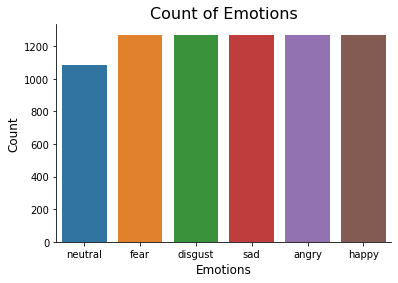

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# Find the length of our selective dataset files.





In [10]:
# We have used glob for reading all the data from the dataset.

from glob import glob

In [11]:
RavdessData=("/content/gdrive/My Drive/Project/Dataset/Ravdess/audio_speech_actors_01-24/Actor_01")
audio_files = glob(RavdessData + '/*.wav')

In [12]:
len(audio_files)

288

# Read the first audio file and create the time array of it

In [13]:
import librosa as lr

In [14]:
audio,sfreq =lr.load(audio_files[6])
time =np.arange(0, len(audio))/sfreq

time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       1.96852608e+00, 1.96857143e+00, 1.96861678e+00])

# Reading all the audio files

In [15]:
%%time
for file in range(0, len(audio_files)):
    
    # Read in the first audio file, create the time array (timeline)
    
    audio, sfreq =lr.load(audio_files[file])
    time =np.arange(0, len(audio))/sfreq

    # Plot audio over time
    fig, ax=plt.subplots()
    ax.plot(time,audio)
    ax.set(xlabel='Time(s)', ylabel='Sound Amplitude')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Paths of other dataset's folder

In [16]:
# Paths to
Ravdess = "/content/gdrive/My Drive/Project/Dataset/Ravdess/audio_speech_actors_01-24"
Savee = "/content/gdrive/My Drive/Project/Dataset/Savee"
Tess = "/content/gdrive/My Drive/Project/Dataset/Tess"

# Ravdess Dataset

In [17]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        emotion = int(info[2])
        emotion_df.append((emotion, os.path.join(Ravdess, dir, wav)))

In [18]:
Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

In [19]:
Ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotion                                               Path
0  neutral  /content/gdrive/My Drive/Project/Dataset/Ravde...
1     fear  /content/gdrive/My Drive/Project/Dataset/Ravde...
2      sad  /content/gdrive/My Drive/Project/Dataset/Ravde...
3  disgust  /content/gdrive/My Drive/Project/Dataset/Ravde...
4    angry  /content/gdrive/My Drive/Project/Dataset/Ravde...

# Tess Dataset

In [20]:
tess_directory_list = os.listdir(Tess)

emotion_df = []

for dir in tess_directory_list:
    for wav in os.listdir(os.path.join(Tess, dir)):
        info = wav.partition(".wav")[0].split("_")
        emo = info[0]
        if emo == "ps":
            emotion_df.append(("surprise", os.path.join(Tess, dir, wav)))
        else:
            emotion_df.append((emo, os.path.join(Tess, dir, wav)))


Tess_df = pd.DataFrame.from_dict(emotion_df)
Tess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Tess_df.head()

Emotion                                               Path
0     YAF  /content/gdrive/My Drive/Project/Dataset/Tess/...
1     YAF  /content/gdrive/My Drive/Project/Dataset/Tess/...
2     YAF  /content/gdrive/My Drive/Project/Dataset/Tess/...
3     YAF  /content/gdrive/My Drive/Project/Dataset/Tess/...
4     YAF  /content/gdrive/My Drive/Project/Dataset/Tess/...

In [21]:
# Let's concat datasets together for doing some analysis
df = pd.concat([Ravdess_df, Tess_df], axis=0)
df.shape

(4478, 2)

In [22]:
df.head(10)

Emotion                                               Path
0  neutral  /content/gdrive/My Drive/Project/Dataset/Ravde...
1     fear  /content/gdrive/My Drive/Project/Dataset/Ravde...
2      sad  /content/gdrive/My Drive/Project/Dataset/Ravde...
3  disgust  /content/gdrive/My Drive/Project/Dataset/Ravde...
4    angry  /content/gdrive/My Drive/Project/Dataset/Ravde...
5     fear  /content/gdrive/My Drive/Project/Dataset/Ravde...
6  disgust  /content/gdrive/My Drive/Project/Dataset/Ravde...
7  neutral  /content/gdrive/My Drive/Project/Dataset/Ravde...
8  neutral  /content/gdrive/My Drive/Project/Dataset/Ravde...
9  neutral  /content/gdrive/My Drive/Project/Dataset/Ravde...

# Graphical representation of our selected dataset

In [23]:
%matplotlib inline

plt.style.use("ggplot")

In [24]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

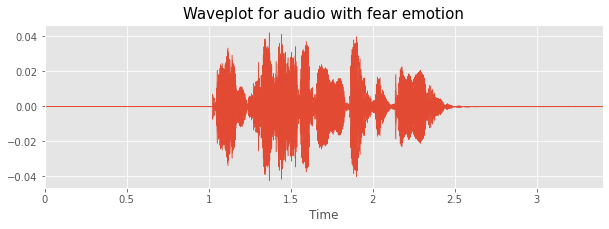

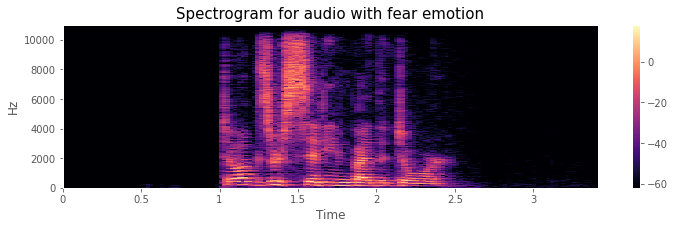

In [25]:
emotion='fear'
path = np.array(df.Path[data_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

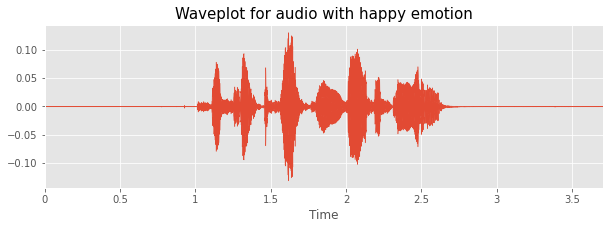

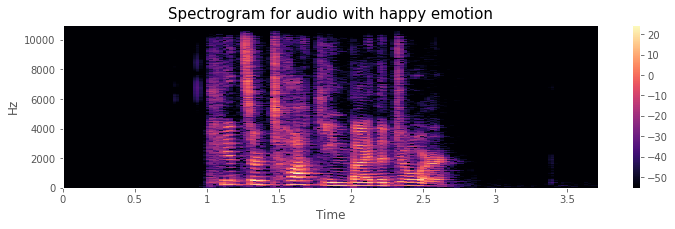

In [26]:
emotion='happy'
path = np.array(df.Path[data_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

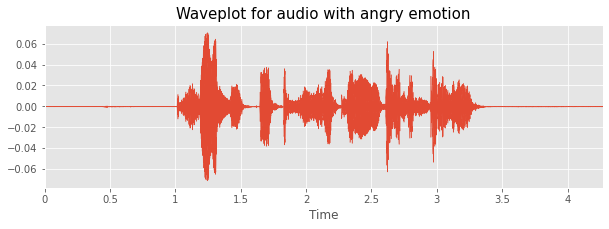

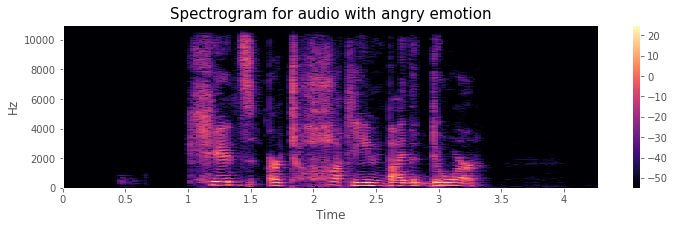

In [27]:
emotion='angry'
path = np.array(df.Path[data_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation

In [28]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data, rate=1000):
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [29]:
df.head()

Emotion                                               Path
0  neutral  /content/gdrive/My Drive/Project/Dataset/Ravde...
1     fear  /content/gdrive/My Drive/Project/Dataset/Ravde...
2      sad  /content/gdrive/My Drive/Project/Dataset/Ravde...
3  disgust  /content/gdrive/My Drive/Project/Dataset/Ravde...
4    angry  /content/gdrive/My Drive/Project/Dataset/Ravde...

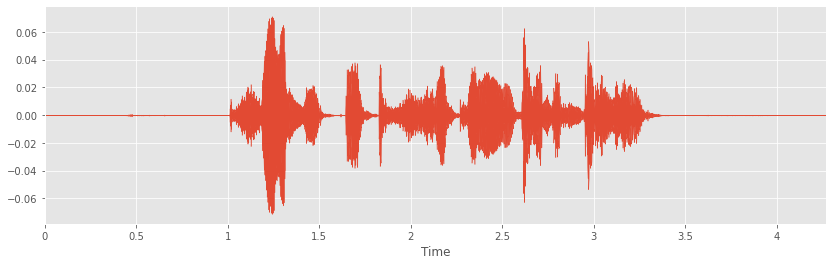

In [30]:
# Simple Audio

plt.figure(figsize=(14,4))
librosa.display.waveplot(data, sampling_rate)
Audio(path)

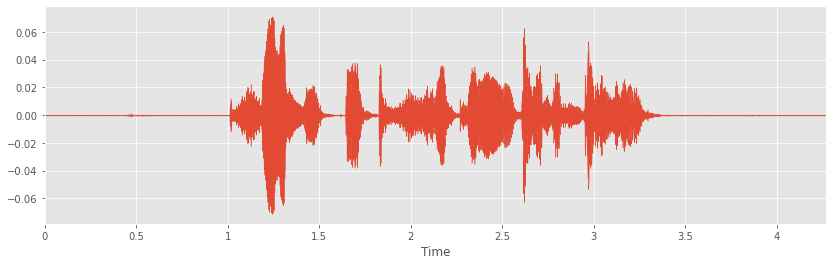

In [31]:
# Noised Audio

noised_data = noise(data, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=noised_data, sr=sampling_rate)
Audio(noised_data, rate=sampling_rate)

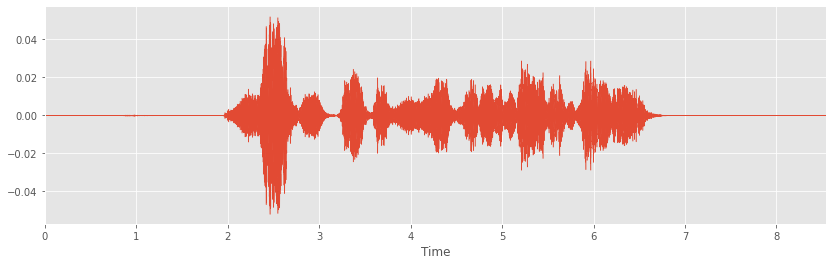

In [32]:
# Stretching

stretched_data = stretch(data, rate=0.5)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=stretched_data, sr=sampling_rate)
Audio(stretched_data, rate=sampling_rate)

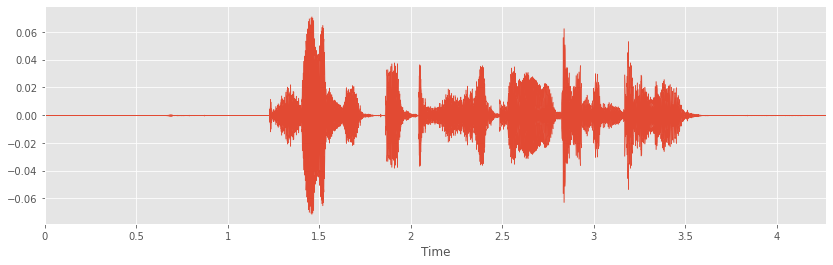

In [33]:
# Shifting Sound

shifted_data = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=shifted_data, sr=sampling_rate)
Audio(shifted_data, rate=sampling_rate)

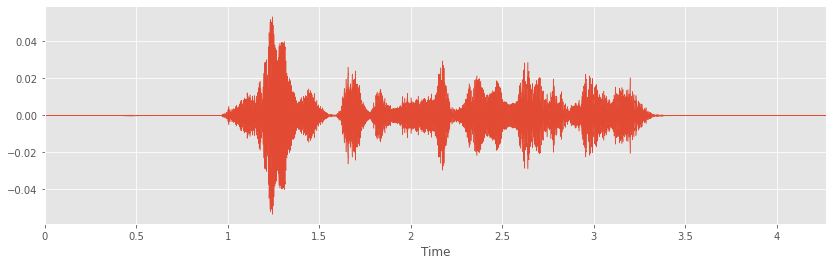

In [34]:
# Pitching sound.
pitched_data = pitch(data, sampling_rate, pitch_factor=0.5, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=pitched_data, sr=sampling_rate)
Audio(pitched_data, rate=sampling_rate)

# We have installed transformer for wavtovec tokenization and audio classification




In [35]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 24.0 MB/s 
     |████████████████████████████████| 6.6 MB 55.1 MB/s 
     |████████████████████████████████| 596 kB 57.1 MB/s 
     |████████████████████████████████| 101 kB 12.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [36]:
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

In [37]:
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.7/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:757: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  FutureWarning,


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
Audio("/content/gdrive/My Drive/Project/Dataset/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav")

In [39]:
speech, rate = librosa.load("/content/gdrive/My Drive/Project/Dataset/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav",sr = 16000)

In [40]:
rate

16000

In [41]:
input_values = tokenizer(speech, return_tensors = 'pt').input_values

In [42]:
input_values

tensor([[-0.0012, -0.0025, -0.0046,  ..., -0.0052, -0.0082, -0.0001]])

In [43]:
logits = model(input_values).logits

In [44]:
logits

tensor([[[ 15.1144, -28.9832, -28.6613,  ...,  -7.6841,  -8.0301,  -8.0455],
         [ 15.1506, -29.0836, -28.7558,  ...,  -7.6829,  -8.0230,  -8.0006],
         [ 15.2267, -29.1065, -28.7784,  ...,  -7.6249,  -8.1255,  -7.9872],
         ...,
         [ 15.0774, -29.0509, -28.7306,  ...,  -7.7849,  -8.3551,  -7.9370],
         [ 15.0087, -29.1287, -28.8080,  ...,  -7.8474,  -8.3938,  -7.9653],
         [ 15.0417, -29.0767, -28.7556,  ...,  -7.8251,  -8.4199,  -7.9393]]],
       grad_fn=<ViewBackward0>)

In [45]:
predicted_ids = torch.argmax(logits, dim = -1)

In [46]:
transcriptions = tokenizer.decode(predicted_ids[0])

In [47]:
print(transcriptions)

KIDS ARE TALKING BY THE DOOR


**Taking large audio file as a sample for speech to text generation**

In [48]:
pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 144 kB/s 


In [49]:
import speech_recognition as sr

In [50]:
r=sr.Recognizer()

In [51]:
Audio("/content/gdrive/My Drive/Project/sample.mp3")

Output hidden; open in https://colab.research.google.com to view.

In [52]:
with sr.AudioFile("/content/gdrive/My Drive/Project/sample.wav") as source:
      audio=r.listen(source)
      try:
        text=r.recognize_google(audio)
        print('You have said : {}'.format(text))

      except:
        print("Please run again")

You have said : what's stopping you don't have enough energy don't have enough time is that what stopping you right now don't have enough money that the thing or is this thing that's stopping you you excuses sound best to the person is making them up stop feeling sorry for yourself get off the pity party telling everybody is sad and SOB stories trying to get people to show up to your pity parties and your pity parades if you ever see me in a Rolls-Royce or six or seven star hotel living my life to the fullest don't get jealous of me because I work my ass off to get it nobody handed me nothing wake your ass up awakened the beast inside its game on its Go season it's time for you to take advantage of the access in the resources that you have in your country and your community you got a problem with your life you got a problem with your environment do something about it if you want it go get it recognized the excuses are not valid


#Feature extraction of our Crema dataset

In [53]:
def mfcc(data, sampling_rate):
    mfcc_feature = librosa.feature.mfcc(y = data, sr = sampling_rate)
    return np.ravel(mfcc_feature.T)

In [54]:
path = np.array(data_df["File_path"])[100]
data, sampling_rate = librosa.load(path, duration = 2.5, offset = 0.6)
print("Length of data: ", len(data))
print("MFrequency Cepstral Coefficients: ", mfcc(data, sampling_rate).shape)

Length of data:  41951
MFrequency Cepstral Coefficients:  (1640,)


In [55]:
def get_features(path, duration =2.5, offset = 0.6):
    data, sampling_rate = librosa.load(path, duration = duration,  offset = offset)
    return mfcc(data, sampling_rate)

In [56]:
# Convert an array into multidimension
data, sampling_rate = librosa.load(path)
type(np.ravel(librosa.feature.mfcc(y = data, sr = sampling_rate).T))

numpy.ndarray

In [57]:
def extract_mfcc(wav_file_name):
  y, sr =librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
  return mfccs

# We have used Crema dataset for features processing

In [58]:
X, Y = [], []
print('Feature processing...')
for path, emotion, index in zip(data_df.File_path, data_df.Emotion, range(data_df.File_path.shape[0])):
    data, sampling_rate = librosa.load(path, duration = 2.5,  offset = 0.6)
    mfcc_feature = np.mean(librosa.feature.mfcc(y = data, sr = sampling_rate,n_mfcc = 40).T,axis=0)
    if index % 100 == 0:
        print(f"{index} samples has been processed...")
    X.append(mfcc_feature)
    Y.append(emotion)
print('Done.')

Feature processing...
0 samples has been processed...
100 samples has been processed...
200 samples has been processed...
300 samples has been processed...
400 samples has been processed...
500 samples has been processed...
600 samples has been processed...
700 samples has been processed...
800 samples has been processed...
900 samples has been processed...
1000 samples has been processed...
1100 samples has been processed...
1200 samples has been processed...
1300 samples has been processed...
1400 samples has been processed...
1500 samples has been processed...
1600 samples has been processed...
1700 samples has been processed...
1800 samples has been processed...
1900 samples has been processed...
2000 samples has been processed...
2100 samples has been processed...
2200 samples has been processed...
2300 samples has been processed...
2400 samples has been processed...
2500 samples has been processed...
2600 samples has been processed...
2700 samples has been processed...
2800 sampl

In [59]:
features_path = './feature_mfcc.csv'

In [60]:
extracted_df = pd.DataFrame(X)
extracted_df['labels'] = Y
extracted_df.to_csv(features_path, index = False)
extracted_df.head(100)

0           1          2          3          4          5  \
0  -385.594666  139.223495   6.905720  59.305759 -29.340670  21.871050   
1  -381.245026  138.452438  -7.313564  62.762341 -27.233076  36.261021   
2  -225.828201  108.454948 -15.913568  22.009222 -27.210220   8.226059   
3  -418.220917  138.206665   7.986157  56.354149 -20.955305  25.844603   
4  -404.403992  131.140381 -11.508129  77.985046 -21.036137  34.337482   
..         ...         ...        ...        ...        ...        ...   
95 -277.446503   89.139496  -4.731362  51.737804 -13.939042  18.784269   
96 -381.644135  143.825989  12.136803  51.707108 -20.941956  12.221430   
97 -371.541016  131.043320  -1.256828  61.424984 -17.558598  20.154743   
98 -340.878662  134.542648  -4.097520  35.538303 -27.402723  17.568832   
99 -413.982178  144.613724  -3.935259  43.706707 -15.721807  29.445463   

            6          7          8         9  ...        31        32  \
0  -13.212139  10.496204 -10.783321 -0.733302  ... -3.481682  4.258740   
1  -14.707186  13.842327 -12.145389  0.491780  ... -3.239420  3.376956   
2  -13.206559   4.837691 -13.617972 -7.968511  ... -2.779403  5.268564   
3  -15.480891  13.094533  -4.801443  1.310086  ... -2.319869  4.349112   
4  -18.026236  18.870285  -6.838957  3.858659  ... -2.905130  4.972241   
..        ...        ...        ...       ...  ...       ...       ...   
95 -21.481951   6.203372 -13.726521 -4.799108  ... -2.232771  4.911258   
96 -11.466456  11.000348 -10.006007 -4.622988  ... -4.885862  1.634568   
97 -16.658674   8.909932  -9.648584 -1.405802  ... -2.408941  3.585433   
98  -8.100573  11.018390 -11.549137 -2.549277  ... -2.577889  3.688922   
99 -12.230868  13.212419  -3.512769 -1.074013  ... -3.659286  3.138347   

          33        34        35        36        37        38        39  \
0  -2.709558  1.193875  0.450469 -0.274936  0.329650 -0.719711  1.332344   
1  -2.820208  2.436121 -1.289358  1.810158  1.170195 -2.260611  0.482197   
2  -0.615625 -0.724997  0.672726 -0.845638 -0.619680 -2.786464  0.036252   
3   1.377217  4.767755  2.590232  3.548973  2.230886 -0.614622  2.147563   
4  -2.514174  4.027695 -0.576063  0.715347  0.697090 -0.717913  1.516035   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.628378  4.228211  3.305492  3.728413  3.754648  0.560081  2.335827   
96 -2.357207  0.782920  0.862522  2.190967  2.393692 -1.392606  2.397504   
97 -1.783604  0.225160  1.260134  1.721138  0.665741  0.060174  2.154014   
98 -0.793522  1.207512  1.610948  0.719193  0.690164 -2.228759 -0.781829   
99 -1.538550  2.011610  2.917588  3.622407  2.143751 -0.739769  2.696611   

     labels  
0   neutral  
1      fear  
2      fear  
3   neutral  
4      fear  
..      ...  
95    angry  
96  disgust  
97  neutral  
98  disgust  
99    happy  

[100 rows x 41 columns]

In [61]:
extracted_df.shape

(7442, 41)

In [62]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(extracted_df.labels)
extracted_df['categorical_label'] = le.transform(extracted_df.labels)

In [63]:
Y = extracted_df.categorical_label
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)

# Splitting

In [64]:
 from sklearn.model_selection import train_test_split

In [65]:
X = np.array(X)
Y = np.array(Y)
X = np.squeeze(X)
X = np.expand_dims(X,-1)
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.05, random_state=42)

# Loading Crema dataset.

In [66]:
df=pd.read_csv('/content/gdrive/My Drive/Project/feature_mfcc.csv')
df.head()

0           1          2          3          4          5  \
0 -383.14676  135.955980   9.612569  57.461690 -28.562822  22.241379   
1 -378.55765  134.861200  -4.327646  60.709750 -26.335897  36.611920   
2 -224.38850  106.534870 -14.327867  20.937584 -26.772858   8.469973   
3 -415.86060  135.057340  10.591139  54.586544 -20.221834  26.223423   
4 -401.52270  127.288635  -8.300509  75.770860 -20.053873  34.688410   

           6          7          8         9  ...        31        32  \
0 -14.682278  12.893817 -13.832767  2.621422  ... -1.969526  3.535073   
1 -16.259638  16.416338 -15.449290  4.155674  ... -1.411857  2.352969   
2 -14.100421   6.275931 -15.433506 -5.984542  ... -1.960389  4.946783   
3 -16.923140  15.430730  -7.761772  4.556173  ... -0.904636  3.728331   
4 -19.663954  21.606804 -10.366751  7.786443  ... -0.776764  3.689417   

         33        34        35        36        37        38        39  \
0 -2.823309  2.100621 -1.120216  1.763797 -1.938726  1.525396 -0.650358   
1 -2.676244  3.150792 -2.750134  3.830204 -1.170939  0.140652 -1.724568   
2 -0.810096 -0.053035 -0.386641  0.471677 -2.041959 -1.417851 -1.132189   
3  1.162659  5.765347  0.945823  5.638331 -0.060720  1.624019  0.201078   
4 -2.179300  4.638988 -2.032447  2.831637 -1.833113  1.948006 -1.005836   

    labels  
0  neutral  
1     fear  
2     fear  
3  neutral  
4     fear  

[5 rows x 41 columns]

In [73]:
x_train[1]

array([[-3.53184235e+02],
       [ 1.34686218e+02],
       [ 1.15700378e+01],
       [ 5.19613228e+01],
       [-6.34089613e+00],
       [ 1.41421385e+01],
       [-2.19769974e+01],
       [-8.21244299e-01],
       [-1.62159996e+01],
       [-2.66864705e+00],
       [ 2.54031253e+00],
       [-1.07305965e+01],
       [ 7.98367167e+00],
       [-1.01975002e+01],
       [ 2.34435773e+00],
       [-8.39792919e+00],
       [-4.96643162e+00],
       [-5.41955376e+00],
       [-5.48017770e-02],
       [ 5.00538683e+00],
       [-2.48653293e+00],
       [ 4.85525560e+00],
       [-3.01067901e+00],
       [ 2.86441994e+00],
       [-9.19316828e-01],
       [ 1.53655624e+00],
       [-7.27432728e-01],
       [-4.24969465e-01],
       [-1.25793040e-01],
       [-3.98552465e+00],
       [ 1.71602464e+00],
       [-7.27687597e-01],
       [ 5.97437525e+00],
       [-5.07675745e-02],
       [-1.56407297e-01],
       [-3.37082654e-01],
       [-1.06149924e+00],
       [ 1.16105771e+00],
       [-5.4

In [74]:
X.shape

(7442, 40, 1)

In [75]:
Y.shape

(7442, 6)

# We have imported some packages for LSTM model implementation

In [76]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.models import Sequential 
#from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#from sklearn.metrics import cohen_kappa_score
#from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pyplot

# LSTM Model

In [77]:
LSTM_model = Sequential([
    LSTM(128, return_sequences=False, input_shape = (40,1)),
    #Dense(128,activation = 'relu'),
    #Dropout(0.2),
    Dense(64,activation = 'relu'),
    Dropout(0.2),
    Dense(32,activation = 'relu'),
    Dropout(0.2),
    Dense(6,activation='softmax')
])

In [87]:
LSTM_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
LSTM_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 77,094
Trainable params: 77,094
Non-traina

In [88]:
LSTM_history = LSTM_model.fit(X
                              ,Y, 
                              validation_data =(x_val,y_val),
                              epochs =100,
                               batch_size =64, 
                              shuffle = True)

Epoch 1/100
117/117 [==============================] - 11s 73ms/step - loss: 0.5663 - accuracy: 0.7811 - val_loss: 0.5136 - val_accuracy: 0.8123
Epoch 2/100
117/117 [==============================] - 8s 69ms/step - loss: 0.5861 - accuracy: 0.7808 - val_loss: 0.4981 - val_accuracy: 0.8276
Epoch 3/100
117/117 [==============================] - 10s 84ms/step - loss: 0.5089 - accuracy: 0.8142 - val_loss: 0.3989 - val_accuracy: 0.8582
Epoch 4/100
117/117 [==============================] - 8s 69ms/step - loss: 0.4864 - accuracy: 0.8202 - val_loss: 0.4257 - val_accuracy: 0.8391
Epoch 5/100
117/117 [==============================] - 9s 78ms/step - loss: 0.5111 - accuracy: 0.8058 - val_loss: 0.4192 - val_accuracy: 0.8391
Epoch 6/100
117/117 [==============================] - 11s 92ms/step - loss: 0.4776 - accuracy: 0.8190 - val_loss: 0.3856 - val_accuracy: 0.8506
Epoch 7/100
117/117 [==============================] - 8s 69ms/step - loss: 0.4819 - accuracy: 0.8170 - val_loss: 0.3906 - val_accura

# Plot the result

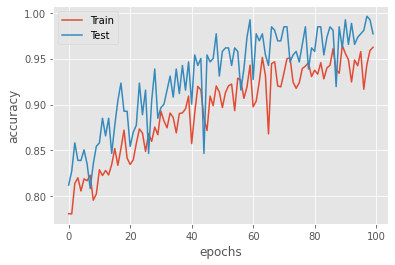

In [89]:
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()



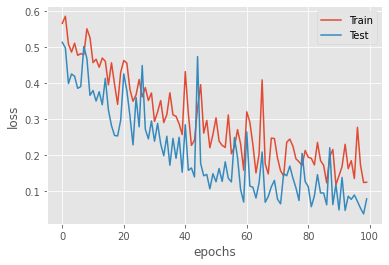

In [90]:
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [91]:
# predict probabilities for test set
y_probs = LSTM_model.predict(x_test, verbose=0)
# predict crisp classes for test set
y_classes = np.argmax(y_probs,1)
y_true_classes = np.argmax(y_test,1)

In [92]:
y_classes.shape

(2233,)

In [93]:
y_true_classes.shape

(2233,)

In [94]:
f1 = f1_score(y_true_classes,y_classes,pos_label='positive'
                                           ,average='micro')
print('F1 score: %f' % f1)

F1 score: 0.986565


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


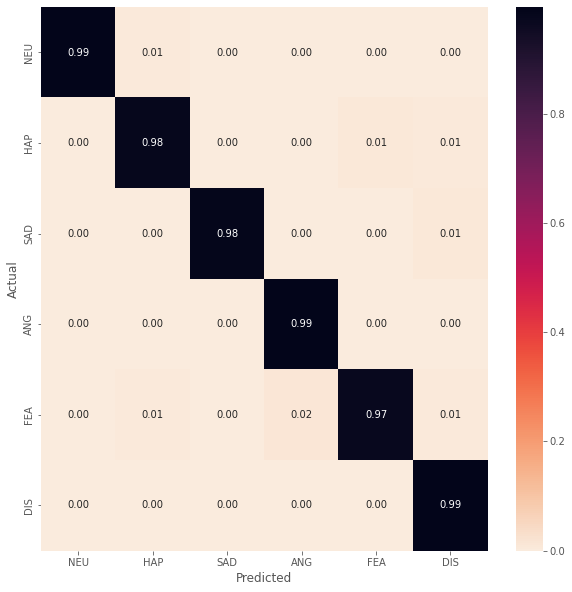

In [95]:
matrix = confusion_matrix(y_true_classes,y_classes, normalize="all")
matn = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matn, annot=True, fmt='.2f', xticklabels=crema_emotions, yticklabels=crema_emotions, cmap='rocket_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)